Name	:	Chaitanya more

Roll_no	:-	01	"B"

Batch	:-	TB1-B2

#### Pratical No 5

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
 df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
 df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.365000
std,7.165832e+04,10.482877,34096.960282,0.482033
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
X=df[['Age','EstimatedSalary']]
Y=df['Purchased']

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state = 42)
print(f'Train Dataset Size-X:{X_train.shape},Y:{Y_train.shape}')
print(f'Test Dataset Size-X:{X_test.shape},Y:{Y_test.shape}')

Train Dataset Size-X:(320, 2),Y:(320,)
Test Dataset Size-X:(80, 2),Y:(80,)


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [16]:
from sklearn.linear_model import LogisticRegression
lm= LogisticRegression(random_state = 42, n_jobs =-1)
lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)

In [17]:
from sklearn.metrics import classification_report
cm= classification_report(Y_test,predictions)
print('Classification report : \n',cm)

Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



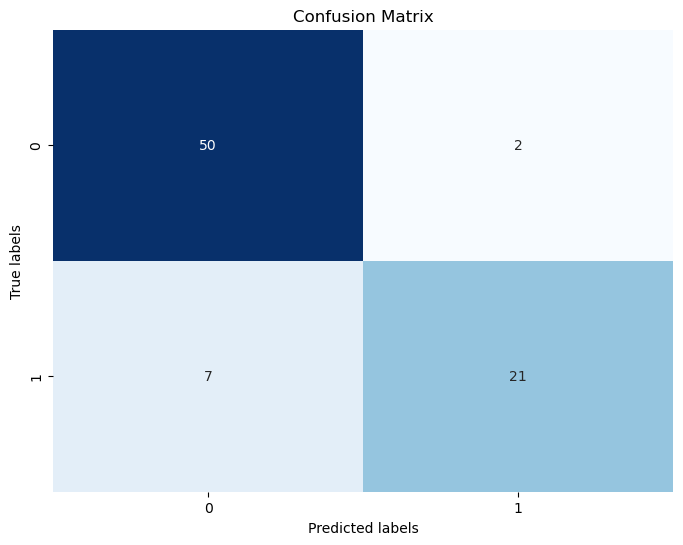

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(Y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
y_pred =lm.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)
TN = cm[0,0]
FP =cm[0,1]
FN =cm[1, 0]
TP = cm[1,1]
accuracy=(TP+TN)/float(TP+TN+FP+FN)
error_rate=(FP+FN)/float(TP+TN+FP+FN)
precision =TP/ float(TP+FP)
recall = TP/float(TP+FN)
print("\nPerformanc Metrics:")
print("True Positives (TP):",TP)
print("False Positives(FP):",FP)
print("True Negatives(TN):", TN)
print("False Negatives (FN):",FN)
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)


Performanc Metrics:
True Positives (TP): 21
False Positives(FP): 2
True Negatives(TN): 50
False Negatives (FN): 7
Accuracy: 0.8875
Error Rate: 0.1125
Precision: 0.9130434782608695
Recall: 0.75
